# Regular Solution Explorer
Compute ΔG_M, its derivatives, spinodal/binodal, and sketch a T–X diagram.

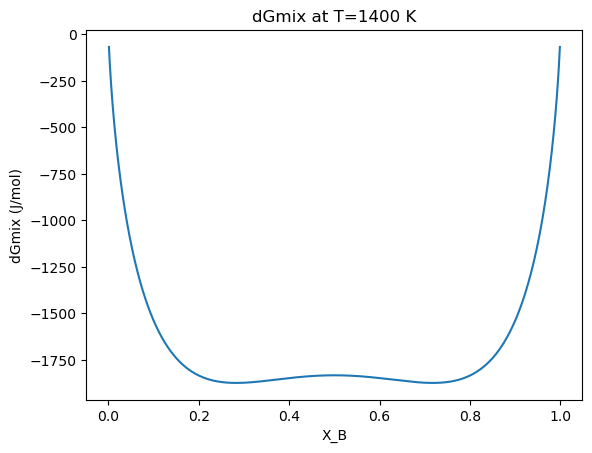

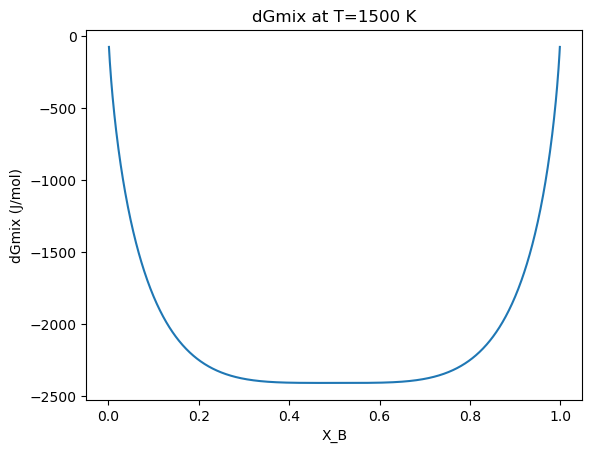

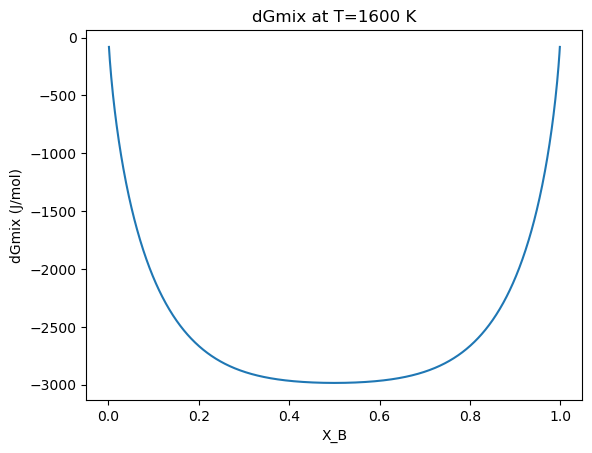

In [1]:
import numpy as np
import matplotlib.pyplot as plt
R=8.314

def dGmix(x,T,alpha):
    x=np.clip(x,1e-9,1-1e-9)
    xa=1-x
    return alpha*x*xa + R*T*(xa*np.log(xa)+x*np.log(x))

def d2(x,T,alpha):
    x=np.clip(x,1e-9,1-1e-9)
    xa=1-x
    return R*T*(1/xa + 1/x) - 2*alpha

alpha=24943.0
for T in [1400,1500,1600]:
    x=np.linspace(1e-3,1-1e-3,1000)
    plt.figure(); plt.plot(x,dGmix(x,T,alpha)); plt.xlabel('X_B'); plt.ylabel('dGmix (J/mol)'); plt.title(f'dGmix at T={T} K')


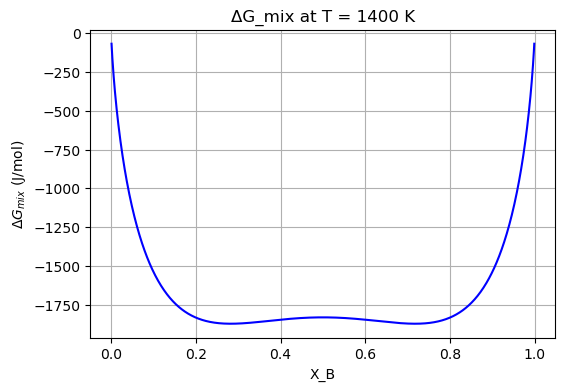

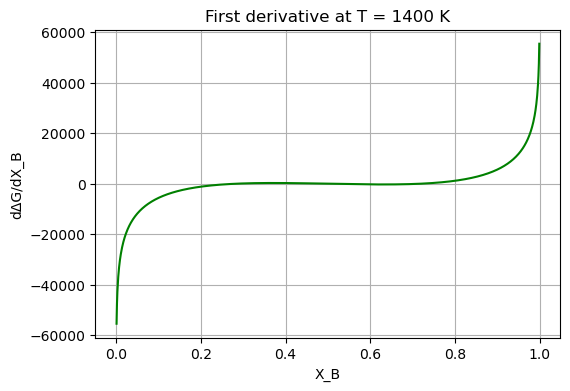

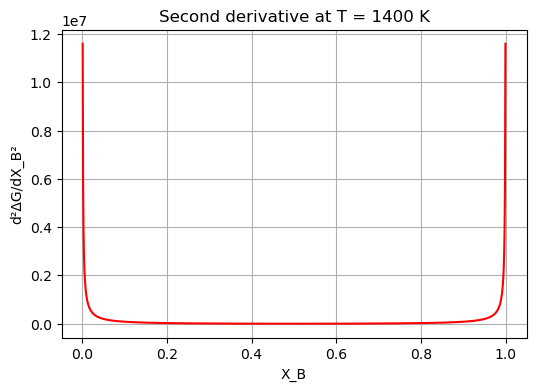

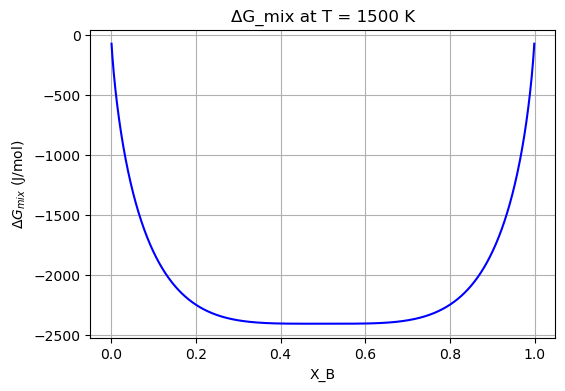

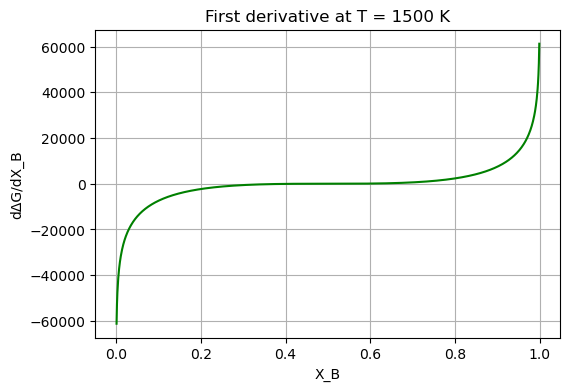

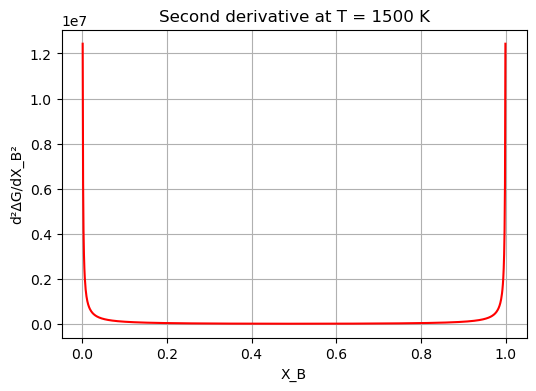

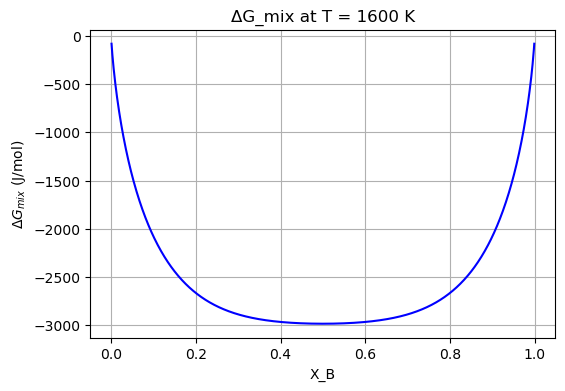

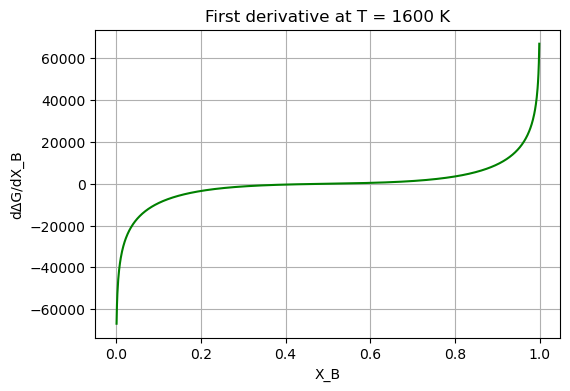

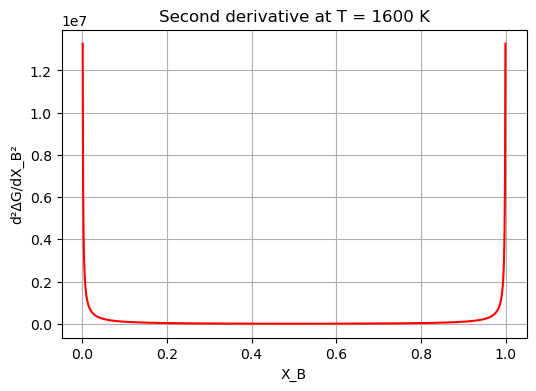

In [2]:
import numpy as np
import matplotlib.pyplot as plt

R = 8.314
alpha = 24943.0

# Gibbs free energy of mixing
def dGmix(x, T, alpha):
    x = np.clip(x, 1e-9, 1-1e-9)
    xa = 1 - x
    return alpha*x*xa + R*T*(x*np.log(x) + xa*np.log(xa))

# First derivative w.r.t. X_B
def dGmix_dx(x, T, alpha):
    x = np.clip(x, 1e-9, 1-1e-9)
    xa = 1 - x
    return alpha*(1 - 2*x) + R*T*(np.log(x) - np.log(xa))

# Second derivative w.r.t. X_B
def dGmix_d2x(x, T, alpha):
    x = np.clip(x, 1e-9, 1-1e-9)
    xa = 1 - x
    return R*T*(1/x + 1/xa) - 2*alpha

# Temperatures to plot
temps = [1400, 1500, 1600]

x = np.linspace(1e-3, 1-1e-3, 1000)

for T in temps:
    G = dGmix(x, T, alpha)
    dG = dGmix_dx(x, T, alpha)
    d2G = dGmix_d2x(x, T, alpha)

    # Plot ΔG_mix
    plt.figure(figsize=(6,4))
    plt.plot(x, G, color='blue')
    plt.xlabel('X_B')
    plt.ylabel(r'$\Delta G_{mix}$ (J/mol)')
    plt.title(f'ΔG_mix at T = {T} K')
    plt.grid(True)
    plt.show()

    # Plot first derivative
    plt.figure(figsize=(6,4))
    plt.plot(x, dG, color='green')
    plt.xlabel('X_B')
    plt.ylabel(r'dΔG/dX_B')
    plt.title(f'First derivative at T = {T} K')
    plt.grid(True)
    plt.show()

    # Plot second derivative
    plt.figure(figsize=(6,4))
    plt.plot(x, d2G, color='red')
    plt.xlabel('X_B')
    plt.ylabel(r'd²ΔG/dX_B²')
    plt.title(f'Second derivative at T = {T} K')
    plt.grid(True)
    plt.show()


Spinodal compositions: [0.49683411 0.50316589]
Binodal compositions: [0.34335848 0.34335848]


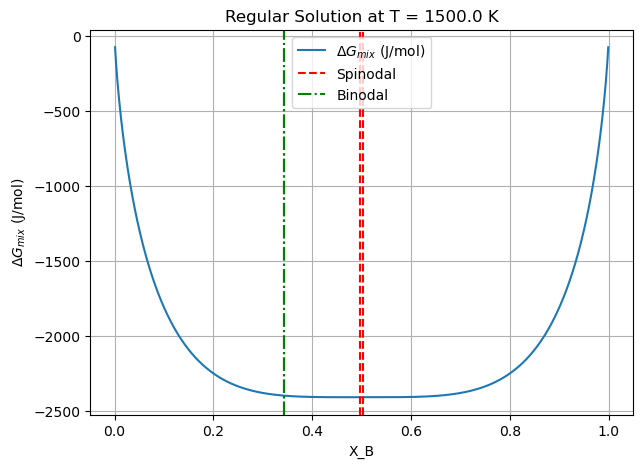

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

R = 8.314
alpha = 24943.0
T = 1500.0  # K

# Functions
def dGmix(x, T, alpha):
    x = np.clip(x, 1e-9, 1-1e-9)
    xa = 1 - x
    return alpha*x*xa + R*T*(x*np.log(x) + xa*np.log(xa))

def dGmix_dx(x, T, alpha):
    x = np.clip(x, 1e-9, 1-1e-9)
    xa = 1 - x
    return alpha*(1 - 2*x) + R*T*(np.log(x) - np.log(xa))

def dGmix_d2x(x, T, alpha):
    x = np.clip(x, 1e-9, 1-1e-9)
    xa = 1 - x
    return R*T*(1/x + 1/xa) - 2*alpha

# ----------------------------
# Spinodal: d2G/dx2 = 0
# ----------------------------
def spinodal_eq(x):
    return dGmix_d2x(x, T, alpha)

# Solve spinodal points numerically
x_guess = [0.1, 0.9]  # initial guesses for two roots
x_spinodal = fsolve(spinodal_eq, x_guess)
print("Spinodal compositions:", x_spinodal)

# ----------------------------
# Binodal: common tangent condition
# For symmetric solution, μ(x1) = μ(x2) where μ = dG/dx
# ----------------------------
def binodal_eq(vars):
    x1, x2 = vars
    mu1 = dGmix_dx(x1, T, alpha)
    mu2 = dGmix_dx(x2, T, alpha)
    # Common tangent condition: slope equal and line passes through points
    eq1 = mu1 - mu2
    eq2 = (dGmix(x2,T,alpha)-dGmix(x1,T,alpha)) - mu1*(x2-x1)
    return [eq1, eq2]

x_guess_binodal = [0.1, 0.9]
x_binodal = fsolve(binodal_eq, x_guess_binodal)
print("Binodal compositions:", x_binodal)

# ----------------------------
# Plot ΔGmix with spinodal and binodal
# ----------------------------
x = np.linspace(0.001,0.999,1000)
G = dGmix(x, T, alpha)

plt.figure(figsize=(7,5))
plt.plot(x, G, label=r'$\Delta G_{mix}$ (J/mol)')
# plt.ylabel(r'$\Delta G_{mix}$ (J/mol)')
plt.axvline(x_spinodal[0], color='red', linestyle='--', label='Spinodal')
plt.axvline(x_spinodal[1], color='red', linestyle='--')
plt.axvline(x_binodal[0], color='green', linestyle='-.', label='Binodal')
plt.axvline(x_binodal[1], color='green', linestyle='-.')
plt.xlabel('X_B')
plt.ylabel(r'$\Delta G_{mix}$ (J/mol)')
plt.title(f'Regular Solution at T = {T} K')
plt.legend()
plt.grid(True)
plt.show()
